<a href="https://colab.research.google.com/github/hvr2026/Clustering-Algorithms/blob/main/K-Means%20Clustering/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Means Clustering on Iris Dataset
This notebook implements k-Means clustering from scratch and applies it to the Iris dataset.

In [1]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


In [15]:
import pandas as pd

In [2]:

# Helper functions for k-Means
def initialize_centroids(X, k):
    np.random.seed(0)
    random_indices = np.random.permutation(X.shape[0])[:k]
    return X[random_indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def recompute_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = recompute_centroids(X, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels


In [3]:

# Load Iris dataset
iris = load_iris()
iris_data = iris.data
iris_target = iris.target


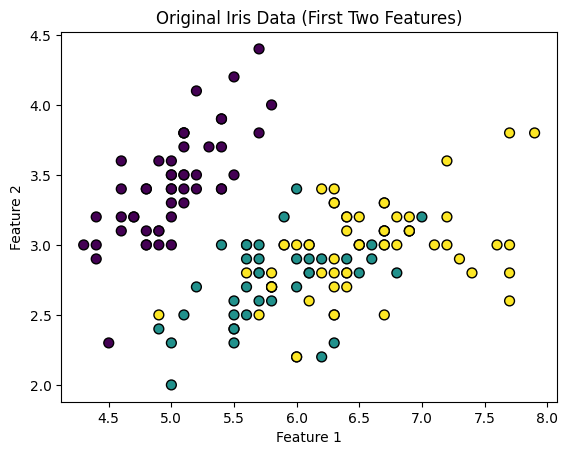

In [4]:

# Visualize original Iris data (first two features) with actual labels
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=iris_target, s=50, cmap='viridis', edgecolor='k')
plt.title("Original Iris Data (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [5]:

# Reduce Iris dataset to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris_data)


In [6]:

# Apply k-Means clustering from scratch on PCA-reduced data
k_real = 3
centroids_pca, labels_pca = k_means(X_pca, k_real)


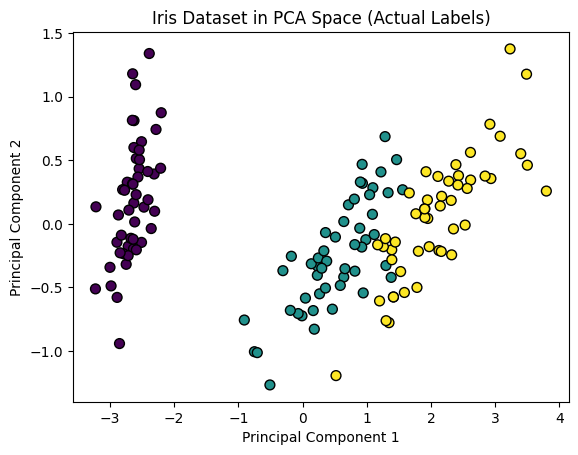

In [7]:

# Visualize PCA-reduced data with actual labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris_target, s=50, cmap='viridis', edgecolor='k')
plt.title("Iris Dataset in PCA Space (Actual Labels)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


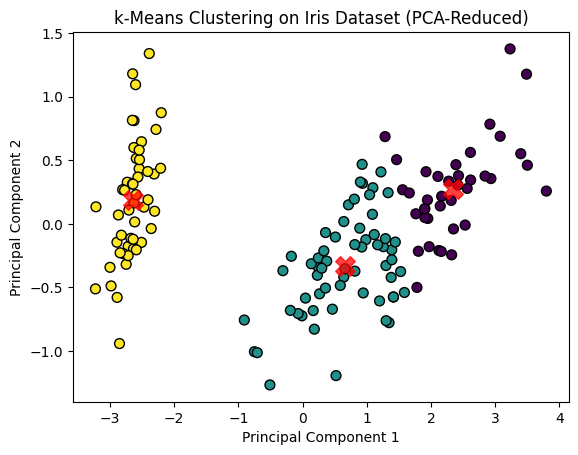

In [8]:

# Visualize k-Means clustering results on PCA-reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, s=50, cmap='viridis', edgecolor='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("k-Means Clustering on Iris Dataset (PCA-Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


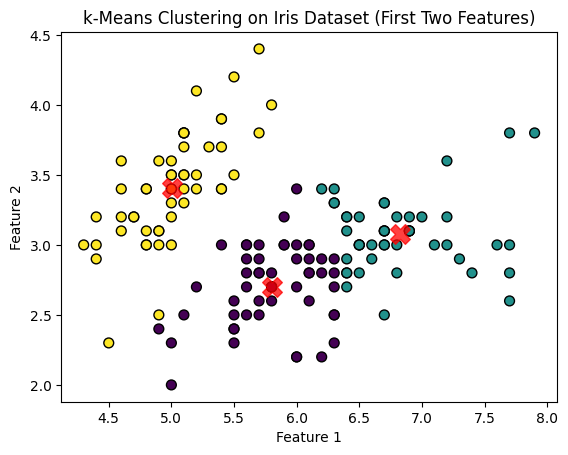

In [9]:

# Visualize clustering on first two features of the Iris dataset
X_real_world = iris_data[:, :2]  # Using first two features
centroids_real, labels_real = k_means(X_real_world, k_real)

plt.scatter(X_real_world[:, 0], X_real_world[:, 1], c=labels_real, s=50, cmap='viridis', edgecolor='k')
plt.scatter(centroids_real[:, 0], centroids_real[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("k-Means Clustering on Iris Dataset (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [10]:

# Compute Inertia (Sum of Squared Distances to Centroids) for k-Means Clustering
def compute_inertia(X, centroids, labels):
    return np.sum((X - centroids[labels])**2)

# Calculate inertia for PCA clustering
inertia_pca = compute_inertia(X_pca, centroids_pca, labels_pca)
print(f"Inertia (PCA-Reduced Data): {inertia_pca:.2f}")

# Calculate inertia for clustering on the first two features
inertia_real_world = compute_inertia(X_real_world, centroids_real, labels_real)
print(f"Inertia (First Two Features): {inertia_real_world:.2f}")


Inertia (PCA-Reduced Data): 63.82
Inertia (First Two Features): 37.09


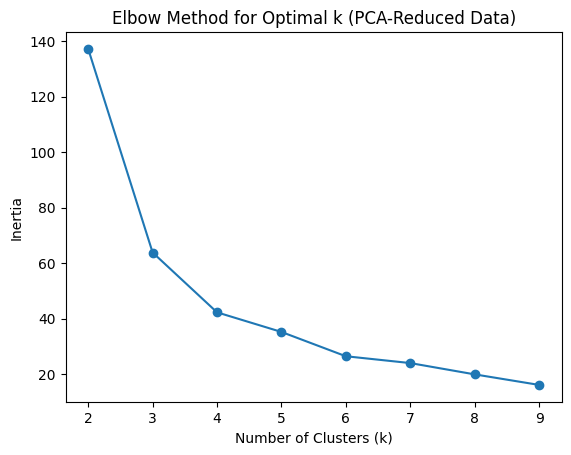

In [11]:

# Experimenting with Different k Values for PCA Data
ks = range(2, 10)
inertias_pca = []

for k in ks:
    centroids, labels = k_means(X_pca, k)
    inertias_pca.append(compute_inertia(X_pca, centroids, labels))

# Plot inertia vs. k (Elbow Method)
plt.figure()
plt.plot(ks, inertias_pca, marker='o')
plt.title("Elbow Method for Optimal k (PCA-Reduced Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [12]:

# Silhouette Score for k-Means Clustering on PCA Data
from sklearn.metrics import silhouette_score

silhouette_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score (PCA-Reduced Data): {silhouette_pca:.2f}")

silhouette_real_world = silhouette_score(X_real_world, labels_real)
print(f"Silhouette Score (First Two Features): {silhouette_real_world:.2f}")


Silhouette Score (PCA-Reduced Data): 0.60
Silhouette Score (First Two Features): 0.44


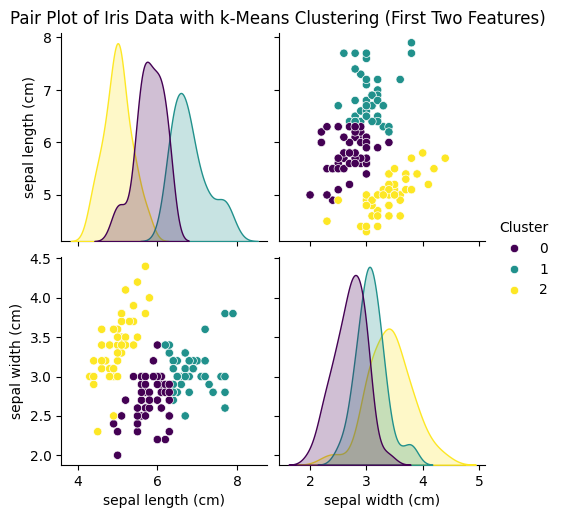

In [16]:

# Visualize Pair Plots with Clusters for Original Data (First Two Features)
import seaborn as sns
iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_df['Cluster'] = labels_real

# Pair plot with cluster assignments
sns.pairplot(iris_df, vars=iris.feature_names[:2], hue='Cluster', diag_kind='kde', palette='viridis')
plt.suptitle("Pair Plot of Iris Data with k-Means Clustering (First Two Features)", y=1.02)
plt.show()


In [17]:

# Comparing k-Means Clustering to True Labels
from sklearn.metrics import adjusted_rand_score

# Compute Adjusted Rand Index to evaluate clustering alignment with true labels
ari_real_world = adjusted_rand_score(iris_target, labels_real)
ari_pca = adjusted_rand_score(iris_target, labels_pca)

print(f"Adjusted Rand Index (First Two Features): {ari_real_world:.2f}")
print(f"Adjusted Rand Index (PCA-Reduced Data): {ari_pca:.2f}")


Adjusted Rand Index (First Two Features): 0.59
Adjusted Rand Index (PCA-Reduced Data): 0.72


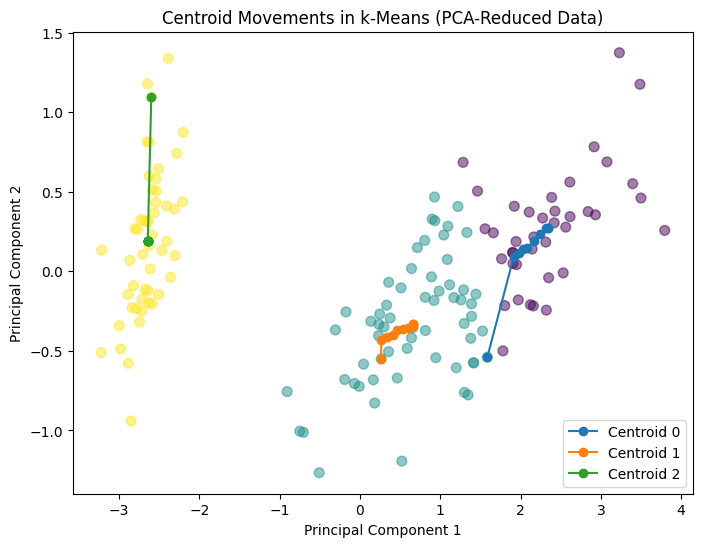

In [18]:

# Visualizing Centroid Movement in Iterations
def k_means_with_trace(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    centroid_history = [centroids.copy()]
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = recompute_centroids(X, labels, k)
        centroid_history.append(new_centroids.copy())
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels, centroid_history

# Run k-Means with centroid tracing
centroids_trace, labels_trace, centroid_history = k_means_with_trace(X_pca, k_real)

# Visualize centroid movements
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_trace, s=50, cmap='viridis', alpha=0.5)
for i, centroid_path in enumerate(zip(*centroid_history)):
    plt.plot([c[0] for c in centroid_path], [c[1] for c in centroid_path], marker='o', label=f'Centroid {i}')
plt.title("Centroid Movements in k-Means (PCA-Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


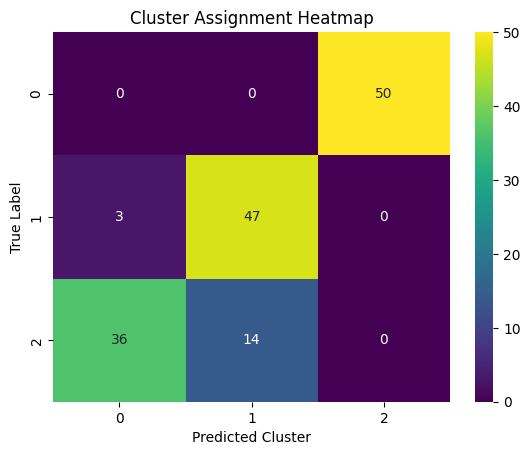

In [19]:

# Heatmap of Cluster Assignments
import seaborn as sns
cluster_heatmap_data = pd.DataFrame({'True Label': iris_target, 'Predicted Cluster (PCA)': labels_pca})
heatmap_data = pd.crosstab(cluster_heatmap_data['True Label'], cluster_heatmap_data['Predicted Cluster (PCA)'])

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis')
plt.title("Cluster Assignment Heatmap")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.show()


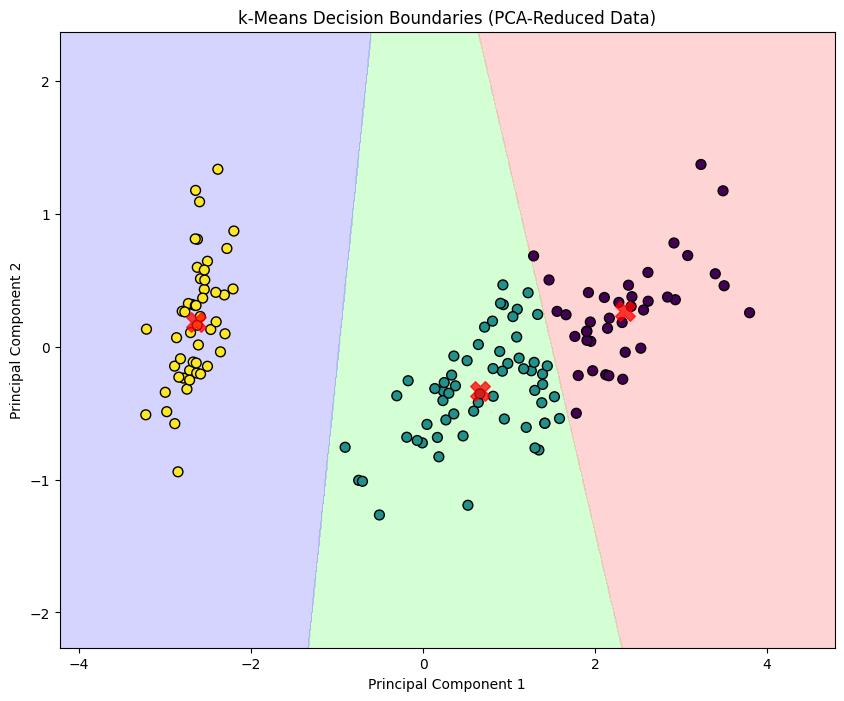

In [20]:

# Visualize Decision Boundaries for k-Means (PCA-Reduced Data)
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, labels, centroids):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    distances = np.linalg.norm(grid[:, np.newaxis] - centroids, axis=2)
    grid_labels = np.argmin(distances, axis=1)
    grid_labels = grid_labels.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, grid_labels, alpha=0.5, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.title("k-Means Decision Boundaries (PCA-Reduced Data)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

plot_decision_boundaries(X_pca, labels_pca, centroids_pca)


Centroids (k-Means++ Initialization):
[[ 2.34652659  0.27393856]
 [ 0.66567601 -0.3316042 ]
 [-2.64241546  0.19088505]]


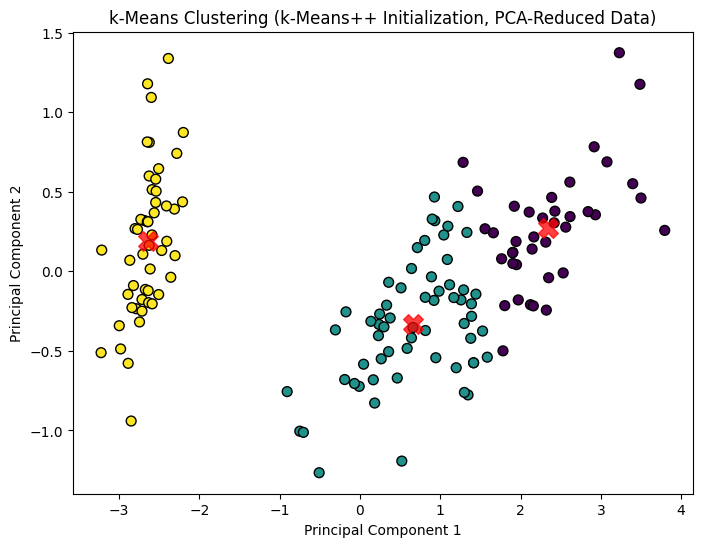

In [21]:

# Compare Initialization Methods (Random vs. k-Means++)
def k_means_plus_plus_initialization(X, k):
    np.random.seed(0)
    centroids = [X[np.random.choice(X.shape[0])]]
    for _ in range(1, k):
        distances = np.min([np.linalg.norm(X - centroid, axis=1)**2 for centroid in centroids], axis=0)
        probabilities = distances / distances.sum()
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        new_centroid = X[np.searchsorted(cumulative_probabilities, r)]
        centroids.append(new_centroid)
    return np.array(centroids)

# Run k-Means with k-Means++ initialization
centroids_kmeanspp = k_means_plus_plus_initialization(X_pca, k_real)
centroids_final_kmeanspp, labels_kmeanspp = k_means(X_pca, k_real)

# Compare results
print("Centroids (k-Means++ Initialization):")
print(centroids_final_kmeanspp)

# Visualize clusters with k-Means++ initialization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeanspp, s=50, cmap='viridis', edgecolor='k')
plt.scatter(centroids_final_kmeanspp[:, 0], centroids_final_kmeanspp[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("k-Means Clustering (k-Means++ Initialization, PCA-Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


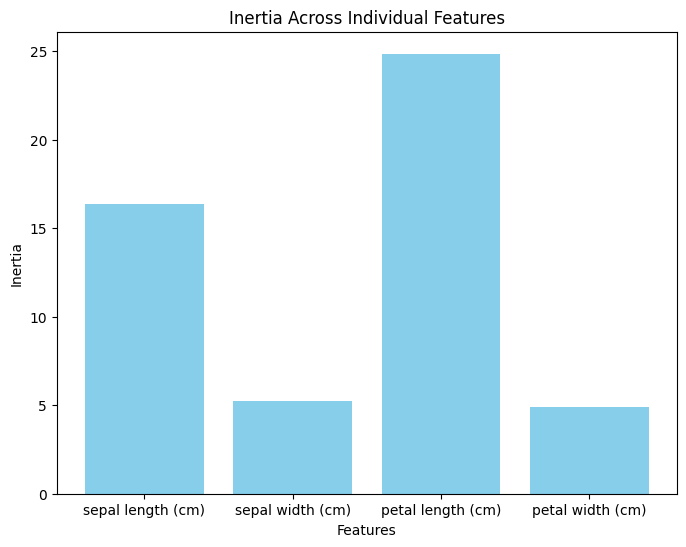

In [22]:

# Clustering Performance Across Features
inertias_features = []
features = iris.feature_names
for i in range(4):
    X_feature = iris_data[:, i].reshape(-1, 1)
    centroids, labels = k_means(X_feature, k_real)
    inertias_features.append(compute_inertia(X_feature, centroids, labels))

# Visualize inertias across features
plt.figure(figsize=(8, 6))
plt.bar(features, inertias_features, color='skyblue')
plt.title("Inertia Across Individual Features")
plt.xlabel("Features")
plt.ylabel("Inertia")
plt.show()
